# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Gatot Triantono]
- **Email:** [gatottriantono2003@gmail.com]
- **ID Dicoding:** [gatot_triantono]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan penggunaan sepeda antara hari kerja dan hari libur?
- Bagaimana tren penggunaan sepeda dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

* Load Day Dataset

In [128]:
day = pd.read_csv('/content/day.csv')
print(day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


* Memilih kolom yang akan digunakan dalam perbedaan antara workingday dan holiday

In [129]:
working_holiday= day[['dteday', 'holiday', 'workingday', 'cnt']]
print(working_holiday.head())

       dteday  holiday  workingday   cnt
0  2011-01-01        0           0   985
1  2011-01-02        0           0   801
2  2011-01-03        0           1  1349
3  2011-01-04        0           1  1562
4  2011-01-05        0           1  1600


* Memilih kolom yang akan digunakan dalam menganalisa tren dari tahun ke tahun

In [130]:
yearly_trend = day[['dteday', 'yr', 'cnt']]
print(yearly_trend.head())

       dteday  yr   cnt
0  2011-01-01   0   985
1  2011-01-02   0   801
2  2011-01-03   0  1349
3  2011-01-04   0  1562
4  2011-01-05   0  1600


### Assessing Data

In [131]:
#Cek tipe data day
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [132]:
#Cek missing values dalam Day datasset
print(day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [133]:
#Cek duplikasi
print("Jumlah duplikat day : ",day.duplicated().sum())

Jumlah duplikat day :  0


### Cleaning Data

In [134]:
# Ubah format kolom 'dteday' menjadi format tanggal jika belum
day['dteday'] = pd.to_datetime(day['dteday'])

# Menambahkan kolom 'year'
day['year'] = day['dteday'].dt.year

# filter data hari libur
holiday = working_holiday[working_holiday['holiday'] == 1]

# Filter data untuk tahun 2011 dan 2012
yearly_trend_filtered = yearly_trend[(yearly_trend_data['yr'] == 0) | (yearly_trend['yr'] == 1)]

In [135]:
print(day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  year        731 non-null  

In [136]:
print(holiday.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 16 to 724
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dteday      21 non-null     object
 1   holiday     21 non-null     int64 
 2   workingday  21 non-null     int64 
 3   cnt         21 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 840.0+ bytes
None


In [137]:
print(yearly_trend_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dteday  731 non-null    object
 1   yr      731 non-null    int64 
 2   cnt     731 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.3+ KB
None


## Exploratory Data Analysis (EDA)

### Explore Data Day

* Perbandingan Penggunaan Sepeda antara Hari Kerja dan Hari Libur

* Statistik Deskriptif Berdasarkan Hari Kerja dan Hari Libur

In [138]:
# Rata-rata pengguna berdasarkan status hari
usage_by_day_type = day_data.groupby('holiday')['cnt'].mean().reset_index()
print("Statistik Penggunaan Sepeda berdasarkan Hari Kerja dan Hari Libur:\n", usage_by_day_type)

Statistik Penggunaan Sepeda berdasarkan Hari Kerja dan Hari Libur:
    holiday          cnt
0        0  4527.104225
1        1  3735.000000


* Jumlah Total Pengguna berdasarkan Hari Kerja dan Hari Libur

In [139]:
# Jumlah total pengguna sepeda berdasarkan status hari
total_usage_by_day_type = day.groupby('holiday')['cnt'].sum().reset_index()
print("Jumlah Total Pengguna Sepeda berdasarkan Hari Kerja dan Hari Libur:\n", total_usage_by_day_type)

Jumlah Total Pengguna Sepeda berdasarkan Hari Kerja dan Hari Libur:
    holiday      cnt
0        0  3214244
1        1    78435


* Tren sepeda dari tahun ke tahun

* Rata-Rata Pengguna Sepeda per Tahun

In [140]:
# Rata-rata pengguna sepeda per tahun
yearly_trend = day.groupby('year')['cnt'].mean().reset_index()
print("Rata-rata Pengguna Sepeda per Tahun:\n", yearly_trend)

Rata-rata Pengguna Sepeda per Tahun:
    year          cnt
0  2011  3405.761644
1  2012  5599.934426


* Total Pengguna Sepeda per Tahun

In [141]:
# Total pengguna sepeda per tahun
total_users_per_year = day.groupby('year')['cnt'].sum().reset_index()
print("Total Pengguna Sepeda per Tahun:\n", total_users_per_year)

Total Pengguna Sepeda per Tahun:
    year      cnt
0  2011  1243103
1  2012  2049576


* Cek Perubahan dari Tahun ke Tahun

In [142]:
# Menghitung perubahan jumlah pengguna dari tahun ke tahun
total_users_per_year['change'] = total_users_per_year['cnt'].diff()
total_users_per_year['change'].fillna(0, inplace=True)
print("Perubahan Pengguna Sepeda dari Tahun ke Tahun:\n", total_users_per_year)

Perubahan Pengguna Sepeda dari Tahun ke Tahun:
    year      cnt    change
0  2011  1243103       0.0
1  2012  2049576  806473.0


<ipython-input-142-10c28ee38a15>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_users_per_year['change'].fillna(0, inplace=True)


## Visualization & Explanatory Analysis

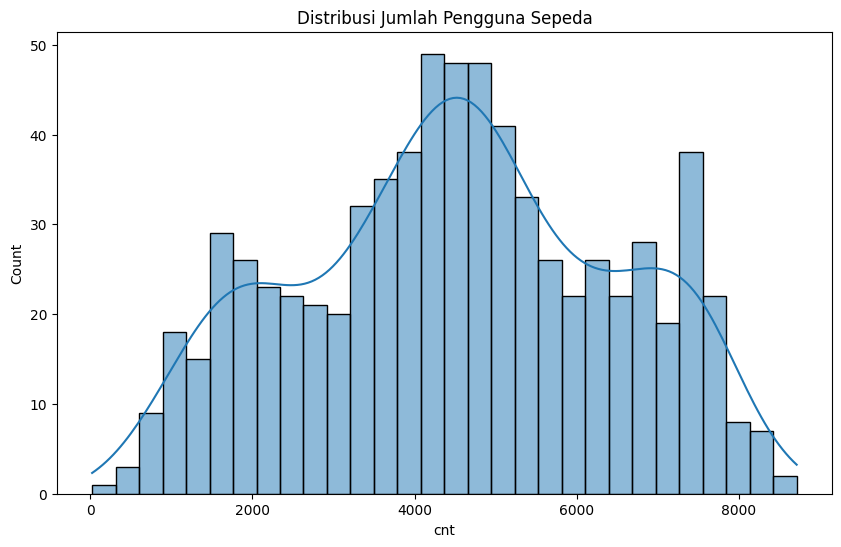

In [143]:
# Histogram jumlah pengguna sepeda
plt.figure(figsize=(10,6))
sns.histplot(day_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 1: Bagaimana perbandingan penggunaan sepeda antara hari kerja dan hari libur?

* Visualisasi Rata-Rata Pengguna Sepeda Berdasarkan Status Hari

<ipython-input-144-15509d1deda7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=usage_by_day_type, palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


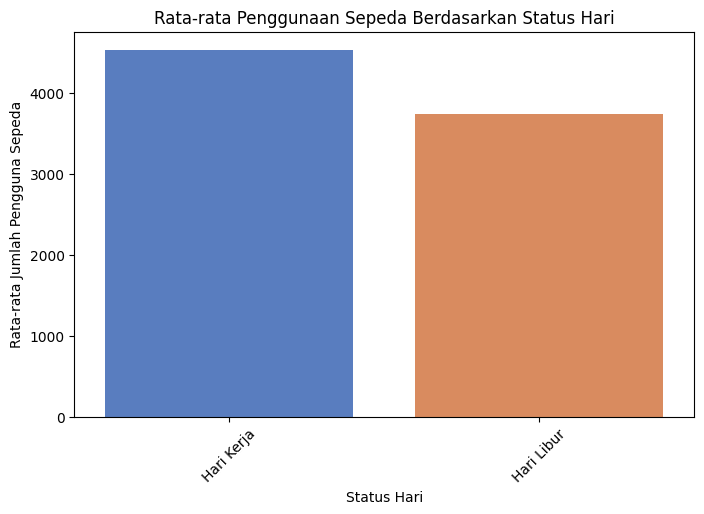

In [144]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='cnt', data=usage_by_day_type, palette='muted')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Status Hari')
plt.xticks([0, 1], ['Hari Kerja', 'Hari Libur'], rotation=45)
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xlabel('Status Hari')
plt.show()

* Visualisasi Total Pengguna Sepeda Berdasarkan Status Hari

<ipython-input-145-a311df8d2bc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=total_usage_by_day_type, palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


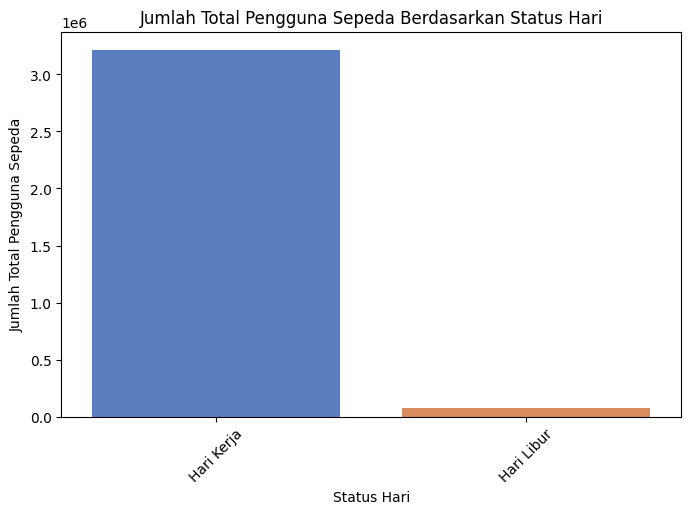

In [145]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='cnt', data=total_usage_by_day_type, palette='muted')
plt.title('Jumlah Total Pengguna Sepeda Berdasarkan Status Hari')
plt.xticks([0, 1], ['Hari Kerja', 'Hari Libur'], rotation=45)
plt.ylabel('Jumlah Total Pengguna Sepeda')
plt.xlabel('Status Hari')
plt.show()

### Pertanyaan 2: Bagaimana tren penggunaan sepeda dari tahun ke tahun?

* Visualisasi Rata-Rata Pengguna Sepeda per Tahun

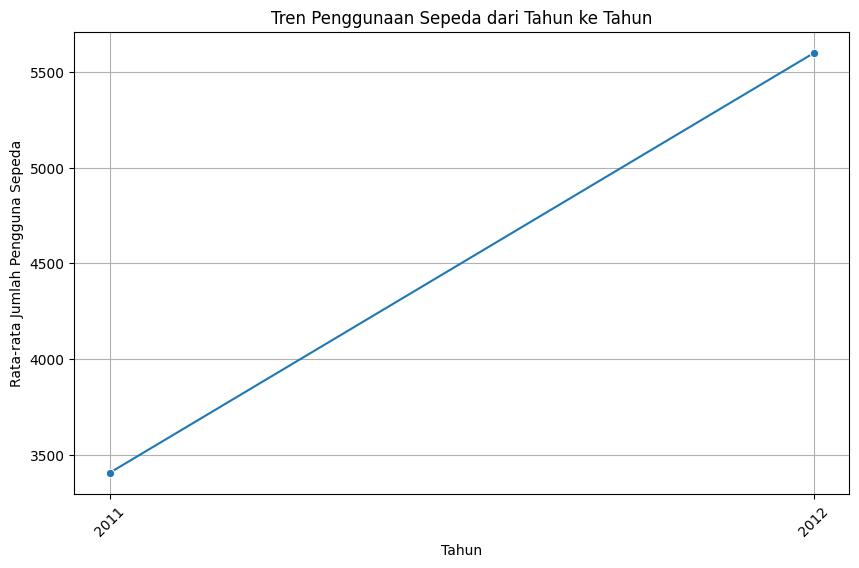

In [146]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='cnt', data=yearly_trend, marker='o')
plt.title('Tren Penggunaan Sepeda dari Tahun ke Tahun')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xlabel('Tahun')
plt.xticks(yearly_trend['year'], rotation=45)
plt.grid()
plt.show()

* Visualisasi Total Pengguna Sepeda per Tahun

<ipython-input-147-c22ec36d8984>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='cnt', data=total_users_per_year, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


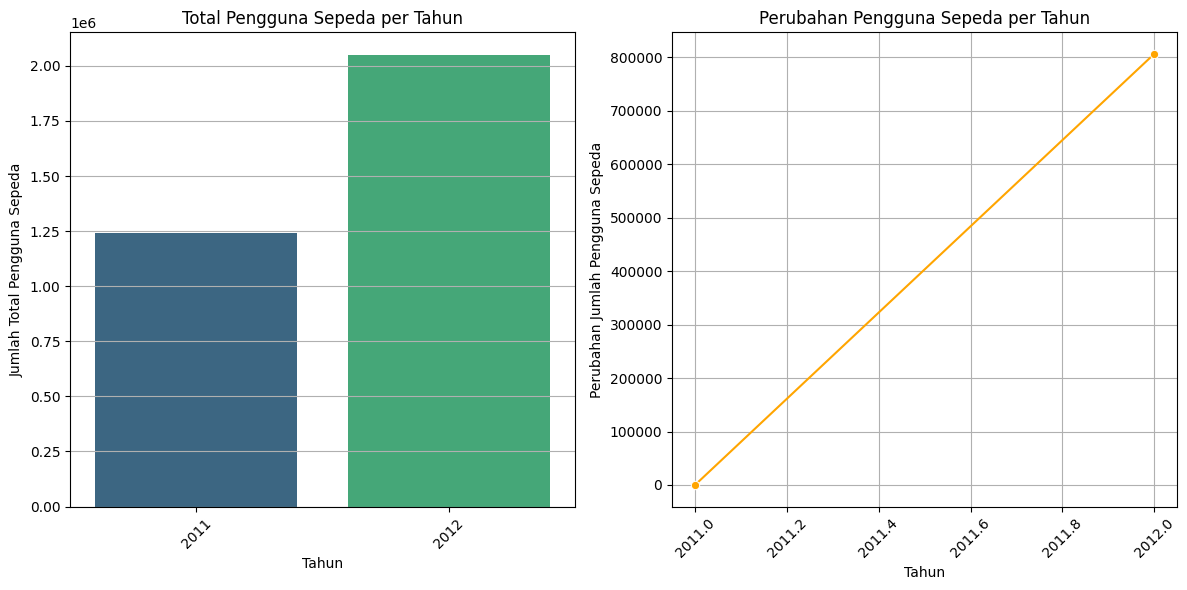

In [147]:
# Visualisasi
plt.figure(figsize=(12, 6))

# Subplot untuk Total Pengguna
plt.subplot(1, 2, 1)
sns.barplot(x='year', y='cnt', data=total_users_per_year, palette='viridis')
plt.title('Total Pengguna Sepeda per Tahun')
plt.ylabel('Jumlah Total Pengguna Sepeda')
plt.xlabel('Tahun')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Subplot untuk Perubahan
plt.subplot(1, 2, 2)
sns.lineplot(x='year', y='change', data=total_users_per_year, marker='o', color='orange')
plt.title('Perubahan Pengguna Sepeda per Tahun')
plt.ylabel('Perubahan Jumlah Pengguna Sepeda')
plt.xlabel('Tahun')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()  # Agar layout lebih rapi
plt.show()

## Conclusion

- Bagaimana perbandingan penggunaan sepeda antara hari kerja dan hari libur?
-Bagaimana tren penggunaan sepeda dari tahun ke tahun?

- Conclution pertanyaan 1 :

-Rata-rata penggunaan sepeda bervariasi berdasarkan hari dalam seminggu, dengan jumlah pengguna yang lebih tinggi pada hari-hari kerja (Senin hingga Jumat) dibandingkan dengan akhir pekan (Sabtu dan Minggu). Ini mungkin menunjukkan bahwa sepeda lebih banyak digunakan sebagai moda transportasi ke tempat kerja atau sekolah daripada sebagai aktivitas rekreasi di akhir pekan.

-Total pengguna sepeda per hari menunjukkan komposisi yang berbeda antara pengguna casual dan registered. Pengguna registered cenderung lebih banyak pada hari-hari kerja, sementara pengguna casual meningkat pada akhir pekan. Ini menunjukkan bahwa pengguna yang terdaftar mungkin lebih berkomitmen untuk menggunakan sepeda secara teratur, sedangkan pengguna casual mungkin menggunakan sepeda lebih untuk rekreasi saat waktu luang.

- Conclution pertanyaan 2 :

-Rata-rata jumlah pengguna sepeda per tahun juga menunjukkan pola peningkatan yang sejalan dengan total pengguna. Ini menunjukkan bahwa tidak hanya jumlah total pengguna meningkat, tetapi juga ada peningkatan rata-rata jumlah pengguna, yang menandakan pertumbuhan yang berkelanjutan dalam penggunaan sepeda.

-Total pengguna sepeda menunjukkan tren yang positif dari tahun ke tahun, dengan peningkatan jumlah pengguna yang signifikan pada tahun-tahun berikutnya. Hal ini dapat menunjukkan peningkatan popularitas sepeda sebagai alat transportasi atau rekreasi di kalangan masyarakat. Penggunaan sepeda mungkin dipengaruhi oleh berbagai faktor, seperti peningkatan infrastruktur sepeda, kampanye untuk menggunakan transportasi ramah lingkungan, dan perubahan perilaku masyarakat.